# TOR Guard Prediction: Comprehensive EDA & Feature Engineering

**Dataset:** `circuit_data_20251120_221959.csv`  
**Circuits:** 25,000  
**Guards:** 500  
**Objective:** Predict Guard node from Middle/Exit node information and circuit features

---

## Analysis Sections:
1. Data Loading & Inspection
2. Data Quality Assessment
3. Target Variable Analysis (Guard Distribution)
4. Feature Analysis (Categorical & Numeric)
5. Correlation Analysis
6. Geographic Patterns
7. Temporal Analysis
8. Feature Engineering
9. Preliminary Model & Feature Importance
10. Model Training Recommendations

## 1. Import Libraries and Setup

In [5]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.4f}'.format)

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
sns.set_context('notebook')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Load Dataset and Initial Inspection

In [6]:
# Load dataset
data_path = Path("../data/circuit_data_20251120_221959.csv")
df = pd.read_csv(data_path)

print(f"Dataset: {data_path.name}")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nData Types:")
print(df.dtypes)

Dataset: circuit_data_20251120_221959.csv
Shape: 25,000 rows × 23 columns
Memory: 26.27 MB

Data Types:
request_id                  int64
circuit_id                  int64
timestamp                  object
status                     object
guard_fingerprint          object
guard_nickname             object
guard_address              object
guard_country              object
middle_fingerprint         object
middle_nickname            object
middle_address             object
middle_country             object
exit_fingerprint           object
exit_nickname              object
exit_address               object
exit_country               object
build_time                 object
purpose                    object
guard_bandwidth             int64
middle_bandwidth            int64
exit_bandwidth              int64
circuit_setup_duration    float64
total_bytes                 int64
dtype: object


In [7]:
# First and last rows
display(df.head(3))
display(df.tail(3))

,request_id,circuit_id,timestamp,status,guard_fingerprint,guard_nickname,guard_address,guard_country,middle_fingerprint,middle_nickname,middle_address,middle_country,exit_fingerprint,exit_nickname,exit_address,exit_country,build_time,purpose,guard_bandwidth,middle_bandwidth,exit_bandwidth,circuit_setup_duration,total_bytes
0,1,1000,2025-11-20T22:19:59.181514,BUILT,876E069801F6E806AFA58453FC325A9D303C24E9,GuardNode313,127.0.188.152,SE,43489B6AB568105516C286B397C6D0115A664B3C,MiddleNode127,127.0.34.59,NL,2582224B076B990FCF17AF48F2CAD85E993B6C23,ExitNode244,127.0.113.61,NL,2025-11-20T22:19:58.246514,GENERAL,8607065,8173916,7136921,2.1205,987644
1,2,1001,2025-11-20T22:20:00.211159,BUILT,C074B2F68EBE9A13600050C198CB26099CEF82C8,GuardNode70,127.0.196.116,JP,4B4B90C150A9CCEE453A0BE96C0C7628EAB0CCC8,MiddleNode460,127.0.255.101,CA,5D1EED26EA565E8F8430EA5AFAC54833895AD574,ExitNode404,127.0.79.41,DE,2025-11-20T22:19:59.698159,GENERAL,6908962,9496694,9986774,2.2611,692031
2,3,1002,2025-11-20T22:20:03.092401,BUILT,286CDD539DA9C350C8068C7D761B5D015B181C1F,GuardNode315,127.0.4.136,AT,1D3097EA84A5B1CD5E85385D3D9D2D1684A51E83,MiddleNode278,127.0.155.111,DE,B8AE5D3497533D66C938AEAFB2A31F17B606222E,ExitNode239,127.0.210.249,CH,2025-11-20T22:20:02.910401,GENERAL,9305689,7711998,7660221,1.0256,956781


,request_id,circuit_id,timestamp,status,guard_fingerprint,guard_nickname,guard_address,guard_country,middle_fingerprint,middle_nickname,middle_address,middle_country,exit_fingerprint,exit_nickname,exit_address,exit_country,build_time,purpose,guard_bandwidth,middle_bandwidth,exit_bandwidth,circuit_setup_duration,total_bytes
0,1,1000,2025-11-20T22:19:59.181514,BUILT,876E069801F6E806AFA58453FC325A9D303C24E9,GuardNode313,127.0.188.152,SE,43489B6AB568105516C286B397C6D0115A664B3C,MiddleNode127,127.0.34.59,NL,2582224B076B990FCF17AF48F2CAD85E993B6C23,ExitNode244,127.0.113.61,NL,2025-11-20T22:19:58.246514,GENERAL,8607065,8173916,7136921,2.1205,987644
1,2,1001,2025-11-20T22:20:00.211159,BUILT,C074B2F68EBE9A13600050C198CB26099CEF82C8,GuardNode70,127.0.196.116,JP,4B4B90C150A9CCEE453A0BE96C0C7628EAB0CCC8,MiddleNode460,127.0.255.101,CA,5D1EED26EA565E8F8430EA5AFAC54833895AD574,ExitNode404,127.0.79.41,DE,2025-11-20T22:19:59.698159,GENERAL,6908962,9496694,9986774,2.2611,692031
2,3,1002,2025-11-20T22:20:03.092401,BUILT,286CDD539DA9C350C8068C7D761B5D015B181C1F,GuardNode315,127.0.4.136,AT,1D3097EA84A5B1CD5E85385D3D9D2D1684A51E83,MiddleNode278,127.0.155.111,DE,B8AE5D3497533D66C938AEAFB2A31F17B606222E,ExitNode239,127.0.210.249,CH,2025-11-20T22:20:02.910401,GENERAL,9305689,7711998,7660221,1.0256,956781


,request_id,circuit_id,timestamp,status,guard_fingerprint,guard_nickname,guard_address,guard_country,middle_fingerprint,middle_nickname,middle_address,middle_country,exit_fingerprint,exit_nickname,exit_address,exit_country,build_time,purpose,guard_bandwidth,middle_bandwidth,exit_bandwidth,circuit_setup_duration,total_bytes
24997,24998,25997,2025-11-21T05:27:54.069275,BUILT,858C6C6AF3ED7E44D97E3FA9B5483E760CB80C04,GuardNode391,127.0.88.87,DE,41F508479BF2AD5CF57C22239C0EF95202BA9A75,MiddleNode237,127.0.217.128,SE,B44F8EB6C2837E6B65BAD5F9BBA7808A3112BD3D,ExitNode417,127.0.106.188,CH,2025-11-21T05:27:53.545275,GENERAL,6102797,9392551,3356008,1.5005,698373
24998,24999,25998,2025-11-21T04:50:37.617763,BUILT,B9A04ACE5058FFE1BD15281D9B1B380C04450E9E,GuardNode187,127.0.98.7,CH,FA6F748E4612AAC0B510CD15C82CE5586FCE54B6,MiddleNode268,127.0.89.137,SE,BC73B4D67FC5CC7BE518508FA72E563254479D56,ExitNode425,127.0.0.33,US,2025-11-21T04:50:36.730763,GENERAL,3540093,3798150,3940027,2.4835,966712
24999,25000,25999,2025-11-21T03:08:06.955428,BUILT,235148D2B169BBEEC58B9713C3E2226B6EA8FED5,GuardNode348,127.0.121.56,US,838ED8C2F8191219F9DC3B60BF20A922E1FCA00A,MiddleNode386,127.0.224.136,US,18897025FBE6B2641A5E7E885DDFE7F299A47AEC,ExitNode376,127.0.156.116,FR,2025-11-21T03:08:06.712428,GENERAL,6739508,2221787,7480747,1.4692,742431


In [8]:
# Summary statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
request_id,25000.0000,NaN,NaN,NaN,12500.5000,7217.0227,1.0000,6250.7500,12500.5000,18750.2500,25000.0000
circuit_id,25000.0000,NaN,NaN,NaN,13499.5000,7217.0227,1000.0000,7249.7500,13499.5000,19749.2500,25999.0000
timestamp,25000,25000,2025-11-20T22:19:59.181514,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,25000,1,BUILT,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guard_fingerprint,25000,500,6F4B867255F0CF7E8A29D7B52087F9E39899E913,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guard_nickname,25000,500,GuardNode324,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guard_address,25000,500,127.0.54.175,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guard_country,25000,10,AT,2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
middle_fingerprint,25000,500,0517713CE145FF59457572B696D9FEF59B376508,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
middle_nickname,25000,500,MiddleNode69,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Quality Assessment

In [9]:
# Missing values analysis
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})

print("Missing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("\n✓ No missing values detected - Dataset is complete!")

Missing Values Summary:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

✓ No missing values detected - Dataset is complete!


In [10]:
# Duplicate check
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Circuit path uniqueness
circuit_paths = df[['guard_fingerprint', 'middle_fingerprint', 'exit_fingerprint']].drop_duplicates()
uniqueness_pct = len(circuit_paths) / len(df) * 100

print(f"Unique circuit paths: {len(circuit_paths):,} / {len(df):,} ({uniqueness_pct:.2f}%)")
if uniqueness_pct > 95:
    print("✓ High path diversity - Good for ML training")

Duplicate rows: 0
Unique circuit paths: 25,000 / 25,000 (100.00%)
✓ High path diversity - Good for ML training


## 4. Target Variable Analysis (Guard Fingerprint)

In [11]:
# Target variable statistics
target_col = 'guard_fingerprint'
n_guards = df[target_col].nunique()
guard_counts = df[target_col].value_counts()

print(f"Target Variable: {target_col}")
print(f"Number of unique classes (guards): {n_guards}")
print(f"\nClass Distribution Statistics:")
print(f"  Min circuits per guard: {guard_counts.min()}")
print(f"  Max circuits per guard: {guard_counts.max()}")
print(f"  Mean circuits per guard: {guard_counts.mean():.2f}")
print(f"  Median circuits per guard: {guard_counts.median():.0f}")
print(f"  Std deviation: {guard_counts.std():.2f}")

# Class imbalance
imbalance_ratio = guard_counts.max() / guard_counts.min()
print(f"\nClass imbalance ratio: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 3:
    print("⚠ High imbalance - Consider class_weight='balanced' in models")
else:
    print("✓ Relatively balanced classes")

Target Variable: guard_fingerprint
Number of unique classes (guards): 500

Class Distribution Statistics:
  Min circuits per guard: 29
  Max circuits per guard: 72
  Mean circuits per guard: 50.00
  Median circuits per guard: 50
  Std deviation: 7.31

Class imbalance ratio: 2.48:1
✓ Relatively balanced classes


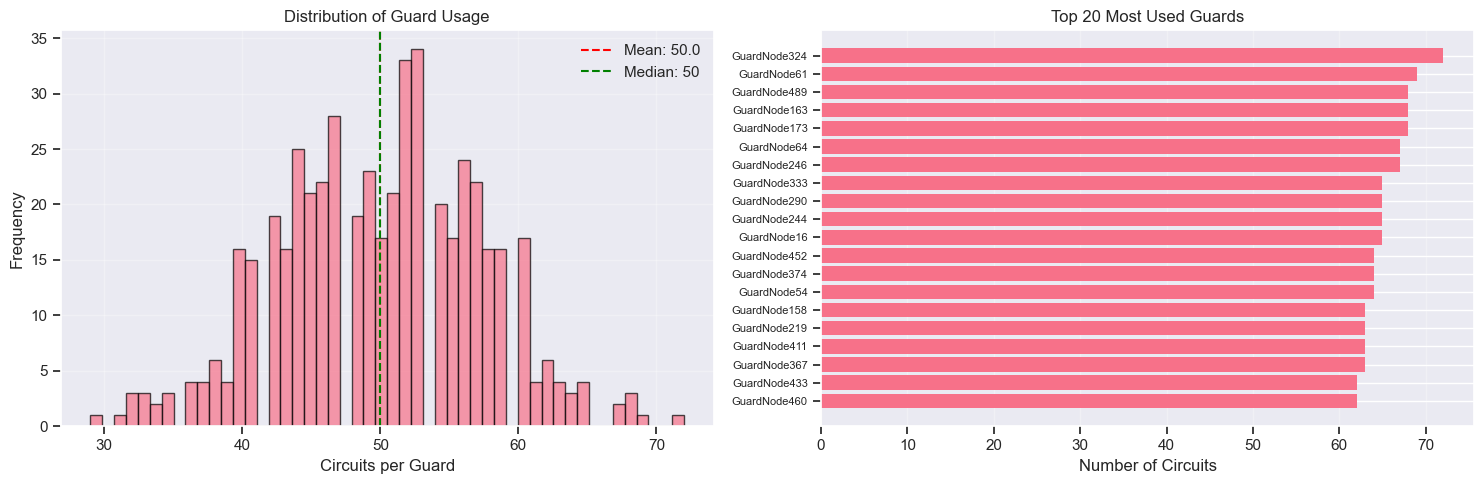

In [12]:
# Visualize guard usage distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(guard_counts.values, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(guard_counts.mean(), color='red', linestyle='--', label=f'Mean: {guard_counts.mean():.1f}')
axes[0].axvline(guard_counts.median(), color='green', linestyle='--', label=f'Median: {guard_counts.median():.0f}')
axes[0].set_xlabel('Circuits per Guard')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Guard Usage')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Top 20 guards
top_20 = guard_counts.head(20)
guard_nicknames = [df[df[target_col] == fp]['guard_nickname'].iloc[0] for fp in top_20.index]
axes[1].barh(range(len(top_20)), top_20.values)
axes[1].set_yticks(range(len(top_20)))
axes[1].set_yticklabels(guard_nicknames, fontsize=8)
axes[1].set_xlabel('Number of Circuits')
axes[1].set_title('Top 20 Most Used Guards')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Numeric Features Analysis

In [13]:
# Identify numeric columns
numeric_cols = ['guard_bandwidth', 'middle_bandwidth', 'exit_bandwidth', 
                'circuit_setup_duration', 'total_bytes']

print("Numeric Features Statistics:")
print(df[numeric_cols].describe().T)

Numeric Features Statistics:
                            count         mean          std          min  \
guard_bandwidth        25000.0000 5548804.6670 2639245.0636 1008553.0000   
middle_bandwidth       25000.0000 5586154.5444 2586888.6829 1132930.0000   
exit_bandwidth         25000.0000 5371297.2072 2612206.7369 1026611.0000   
circuit_setup_duration 25000.0000       1.5000       0.5780       0.5000   
total_bytes            25000.0000  505150.2525  285972.9756   10035.0000   

                                25%          50%          75%          max  
guard_bandwidth        3461462.0000 5570496.0000 7981063.0000 9977839.0000  
middle_bandwidth       3380949.0000 5589479.0000 7751623.0000 9986739.0000  
exit_bandwidth         3106935.0000 5324349.0000 7660221.0000 9994237.0000  
circuit_setup_duration       1.0017       1.4998       2.0024       2.4999  
total_bytes             258571.7500  502431.5000  751029.5000  999969.0000  


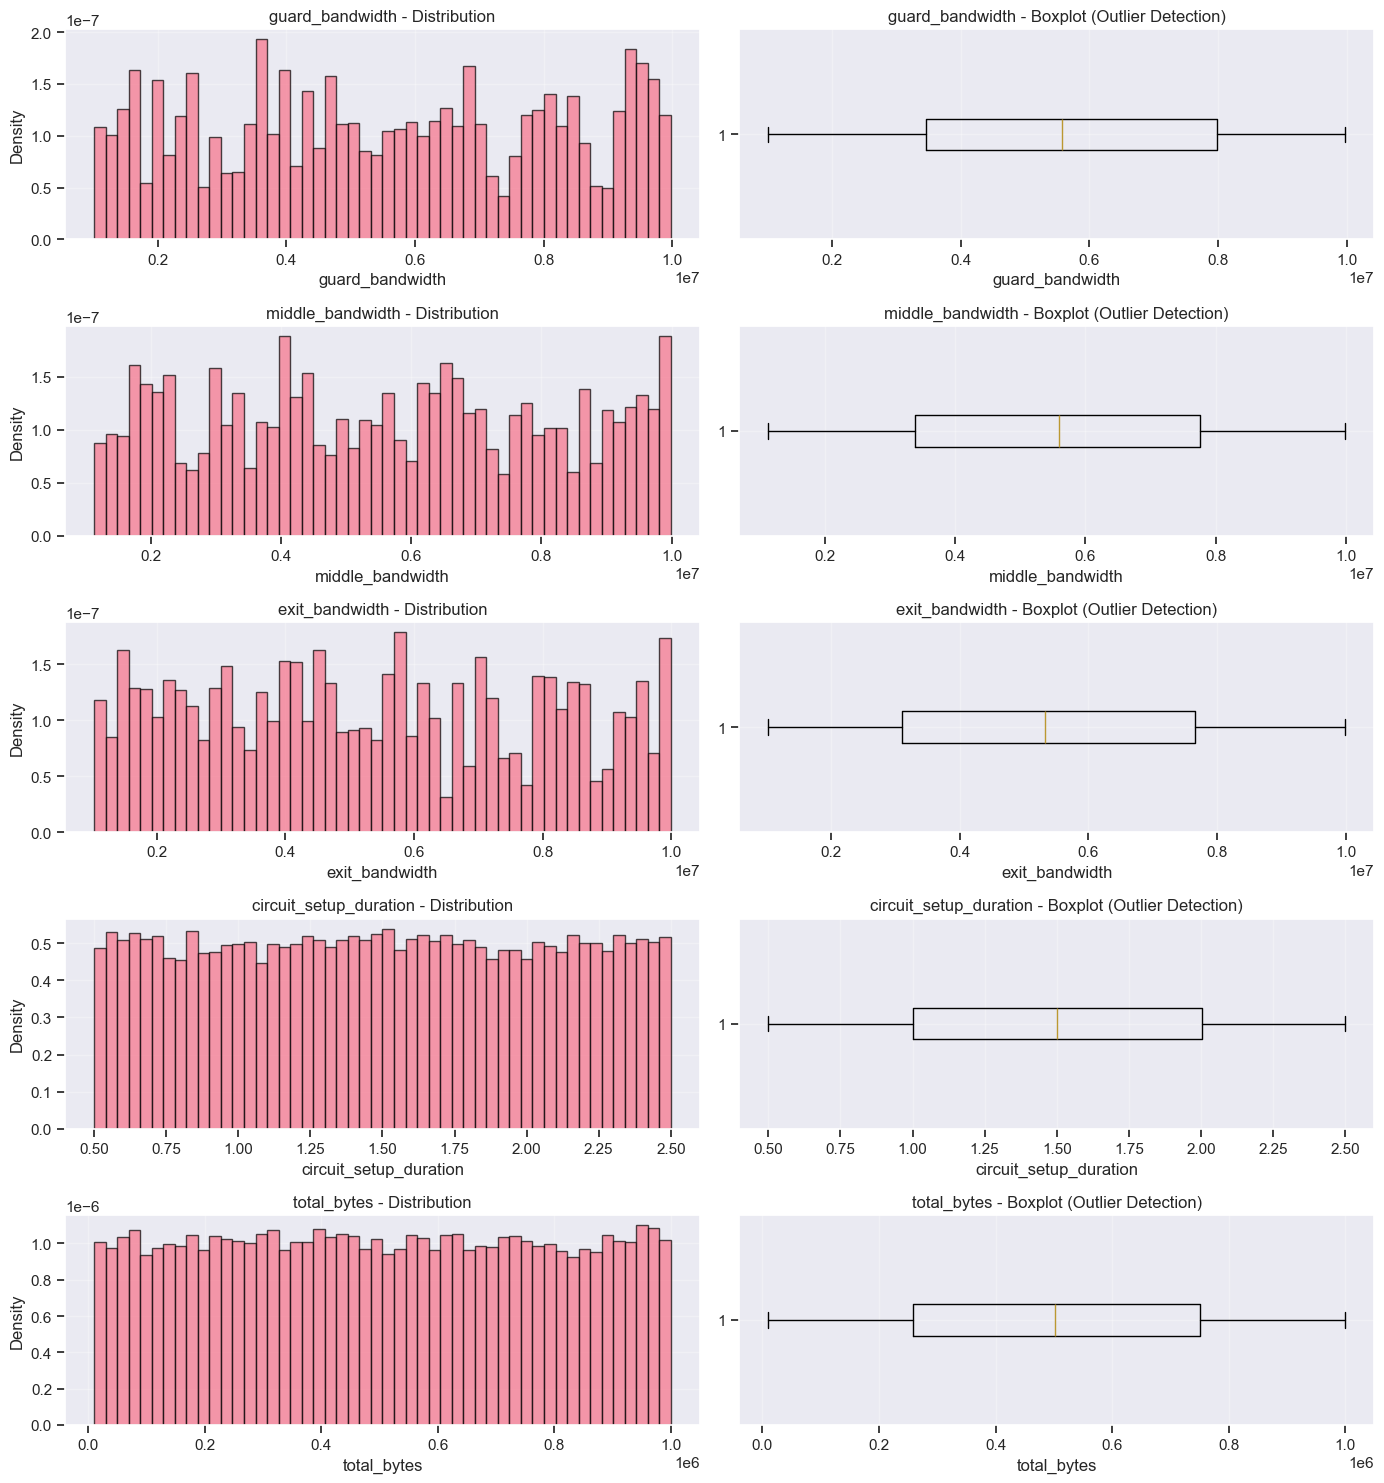

In [14]:
# Distribution plots for numeric features
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(14, 3*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    # Histogram with KDE
    axes[i, 0].hist(df[col], bins=50, edgecolor='black', alpha=0.7, density=True)
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].set_title(f'{col} - Distribution')
    axes[i, 0].grid(alpha=0.3)
    
    # Boxplot
    axes[i, 1].boxplot(df[col], vert=False)
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_title(f'{col} - Boxplot (Outlier Detection)')
    axes[i, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
# Outlier detection (IQR method)
print("Outlier Detection (IQR Method):")
print("-" * 50)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_pct = outliers / len(df) * 100
    
    print(f"{col:30s}: {outliers:5,} outliers ({outlier_pct:5.2f}%)")

Outlier Detection (IQR Method):
--------------------------------------------------
guard_bandwidth               :     0 outliers ( 0.00%)
middle_bandwidth              :     0 outliers ( 0.00%)
exit_bandwidth                :     0 outliers ( 0.00%)
circuit_setup_duration        :     0 outliers ( 0.00%)
total_bytes                   :     0 outliers ( 0.00%)


## 6. Categorical Features Analysis

In [16]:
# Categorical features
categorical_cols = ['guard_country', 'middle_country', 'exit_country', 'status', 'purpose']

for col in categorical_cols:
    if col in df.columns:
        n_unique = df[col].nunique()
        print(f"\n{col}:")
        print(f"  Unique values: {n_unique}")
        print(f"  Top 10 values:")
        value_counts = df[col].value_counts().head(10)
        for val, count in value_counts.items():
            print(f"    {val}: {count:,} ({count/len(df)*100:.2f}%)")


guard_country:
  Unique values: 10
  Top 10 values:
    AT: 2,977 (11.91%)
    NL: 2,972 (11.89%)
    US: 2,950 (11.80%)
    DE: 2,924 (11.70%)
    CA: 2,636 (10.54%)
    GB: 2,288 (9.15%)
    JP: 2,220 (8.88%)
    FR: 2,205 (8.82%)
    SE: 2,011 (8.04%)
    CH: 1,817 (7.27%)

middle_country:
  Unique values: 10
  Top 10 values:
    AT: 2,850 (11.40%)
    DE: 2,831 (11.32%)
    SE: 2,758 (11.03%)
    JP: 2,608 (10.43%)
    CH: 2,575 (10.30%)
    CA: 2,562 (10.25%)
    GB: 2,442 (9.77%)
    FR: 2,242 (8.97%)
    US: 2,130 (8.52%)
    NL: 2,002 (8.01%)

exit_country:
  Unique values: 10
  Top 10 values:
    CA: 3,540 (14.16%)
    AT: 2,792 (11.17%)
    FR: 2,777 (11.11%)
    JP: 2,480 (9.92%)
    GB: 2,478 (9.91%)
    DE: 2,388 (9.55%)
    US: 2,313 (9.25%)
    NL: 2,212 (8.85%)
    CH: 2,036 (8.14%)
    SE: 1,984 (7.94%)

status:
  Unique values: 1
  Top 10 values:
    BUILT: 25,000 (100.00%)

purpose:
  Unique values: 1
  Top 10 values:
    GENERAL: 25,000 (100.00%)


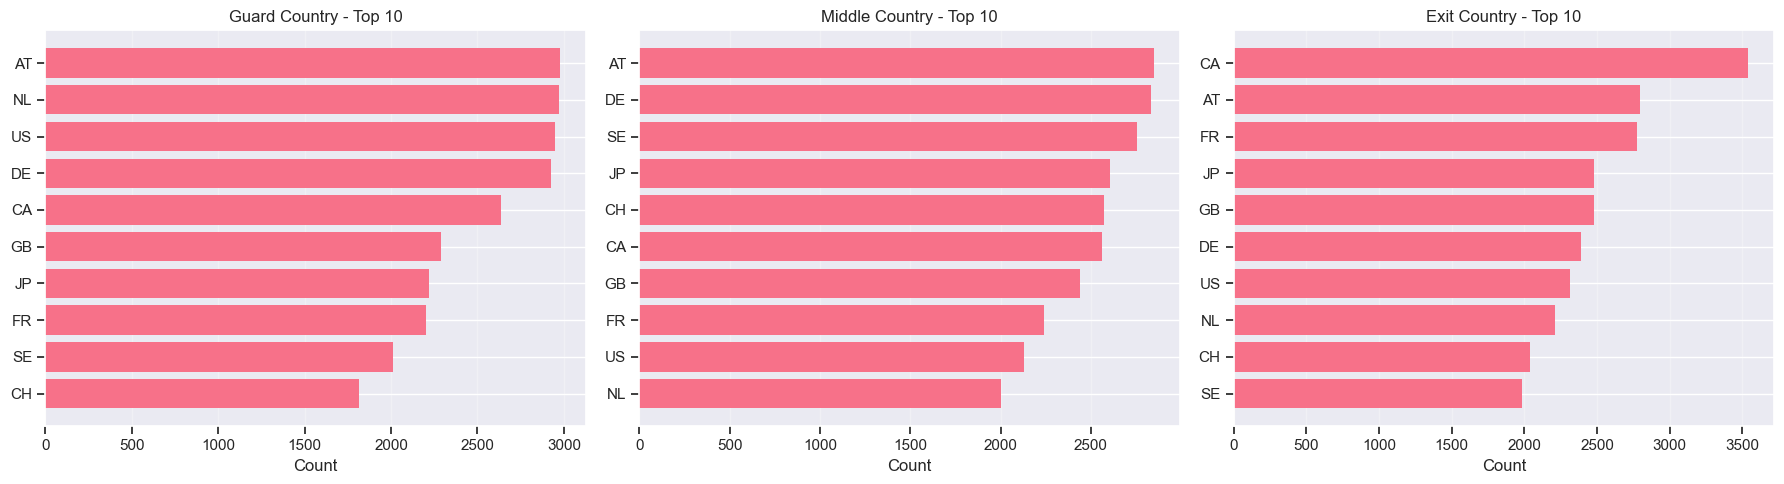

In [17]:
# Visualize country distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(['guard_country', 'middle_country', 'exit_country']):
    country_counts = df[col].value_counts().head(10)
    axes[idx].barh(range(len(country_counts)), country_counts.values)
    axes[idx].set_yticks(range(len(country_counts)))
    axes[idx].set_yticklabels(country_counts.index)
    axes[idx].set_xlabel('Count')
    axes[idx].set_title(f'{col.replace("_", " ").title()} - Top 10')
    axes[idx].invert_yaxis()
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

In [18]:
# Correlation matrix
corr_matrix = df[numeric_cols].corr(method='pearson')

print("Correlation Matrix:")
print(corr_matrix.round(3))

Correlation Matrix:
                        guard_bandwidth  middle_bandwidth  exit_bandwidth  \
guard_bandwidth                  1.0000            0.0040          0.0020   
middle_bandwidth                 0.0040            1.0000         -0.0110   
exit_bandwidth                   0.0020           -0.0110          1.0000   
circuit_setup_duration          -0.0050            0.0150          0.0020   
total_bytes                     -0.0120            0.0000          0.0010   

                        circuit_setup_duration  total_bytes  
guard_bandwidth                        -0.0050      -0.0120  
middle_bandwidth                        0.0150       0.0000  
exit_bandwidth                          0.0020       0.0010  
circuit_setup_duration                  1.0000       0.0040  
total_bytes                             0.0040       1.0000  


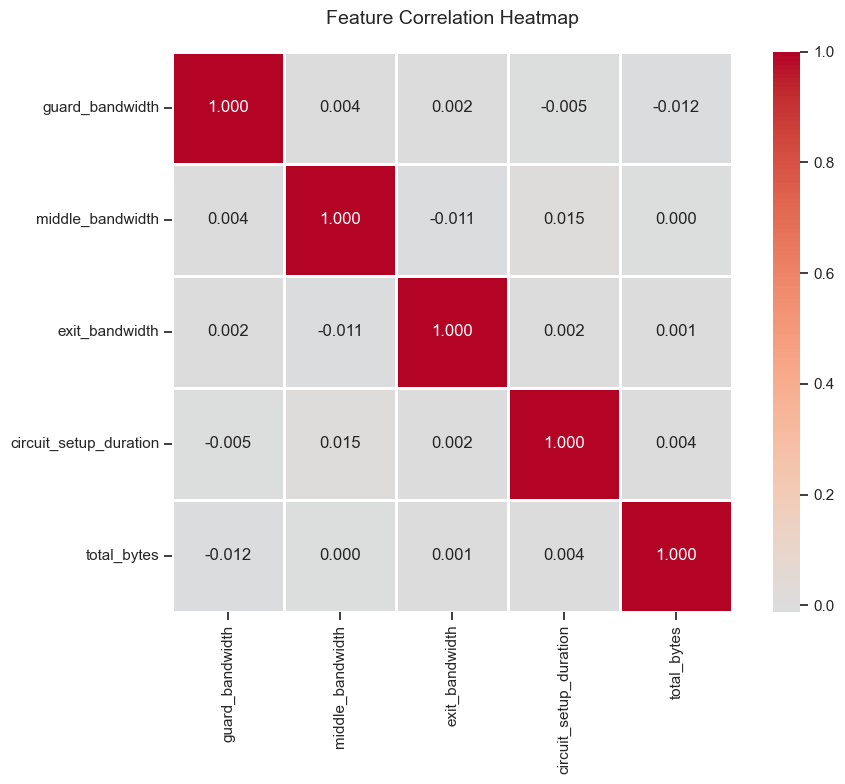


Highly Correlated Feature Pairs (|r| > 0.7):
  ✓ No highly correlated pairs found


In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Heatmap', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Find highly correlated pairs
print("\nHighly Correlated Feature Pairs (|r| > 0.7):")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
            print(f"  {corr_matrix.columns[i]} <-> {corr_matrix.columns[j]}: {corr_val:.3f}")

if not high_corr_pairs:
    print("  ✓ No highly correlated pairs found")

## 8. Geographic Patterns